<a href="https://colab.research.google.com/github/mohammedmoin44/EDA-Airbnb-NYC/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
##importing impordent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
##Mounting Drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Reading CSV File Using Pandas
df = pd.read_csv('/content/drive/My Drive/Airbnb NYC 2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


|index|id|host\_id|latitude|longitude|price|minimum\_nights|number\_of\_reviews|reviews\_per\_month|calculated\_host\_listings\_count|availability\_365|
|---|---|---|---|---|---|---|---|---|---|---|
|count|48895\.0|48895\.0|48895\.0|48895\.0|48895\.0|48895\.0|48895\.0|38843\.0|48895\.0|48895\.0|
|mean|19017143\.236179568|67620010\.64661008|40\.72894888066264|-73\.95216961468454|152\.7206871868289|7\.029962163820431|23\.274465691788528|1\.3732214298586618|7\.143982002249719|112\.78132733408324|
|std|10983108\.385610096|78610967\.03266661|0\.054530078057371915|0\.04615673610637153|240\.15416974718758|20\.51054953317987|44\.55058226668393|1\.6804419952744725|32\.95251884941993|131\.62228885171479|
|min|2539\.0|2438\.0|40\.49979|-74\.24442|0\.0|1\.0|0\.0|0\.01|1\.0|0\.0|
|25%|9471945\.0|7822033\.0|40\.6901|-73\.98307|69\.0|1\.0|1\.0|0\.19|1\.0|0\.0|
|50%|19677284\.0|30793816\.0|40\.72307|-73\.95568|106\.0|3\.0|5\.0|0\.72|1\.0|45\.0|
|75%|29152178\.5|107434423\.0|40\.763115|-73\.936275|175\.0|5\.0|24\.0|2\.02|2\.0|227\.0|
|max|36487245\.0|274321313\.0|40\.91306|-73\.71299|10000\.0|1250\.0|629\.0|58\.5|327\.0|365\.0|

In [ ]:
##finding null values
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
##Finding what is the percentage of null values
print(f'{(df.isnull().sum()/len(df))*100} %')


id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64 %


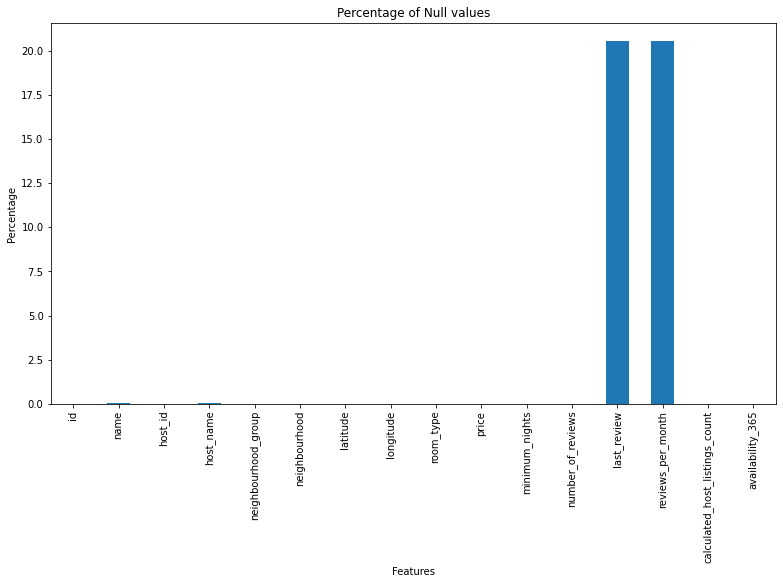

In [ ]:
##plotting 
plt.figure(figsize=(13,7))
plt.title('Percentage of Null values')
plt.xlabel('Features')
plt.ylabel('Percentage')
((df.isnull().sum()/len(df))*100).plot(kind = 'bar')

In [ ]:
df1 = df.drop(columns=['id','name','last_review'])

Removing columns which does not have any impact and removing name column to protect the privacy of user's

In [ ]:
df_categorical = df1.drop(columns=['neighbourhood','host_name'])

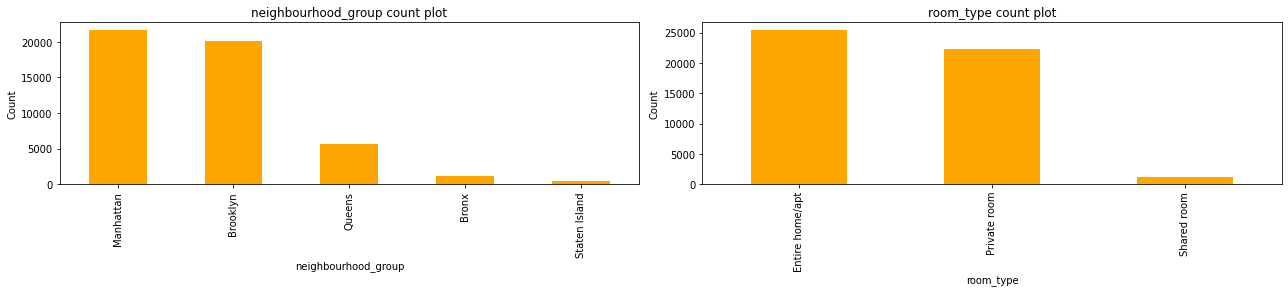

In [ ]:
#plotting object type variables Neighbourhood group and Room type
plt.figure(figsize=(18, 18))
for i, col in enumerate(df_categorical.select_dtypes(include=['object']).columns):

    ax = plt.subplot(5,2, i+1)
    df[col].value_counts().plot.bar(color='orange')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} ''count plot')
plt.tight_layout()

Text(0.5, 1.0, 'Neighbourhood Group by Average Price')

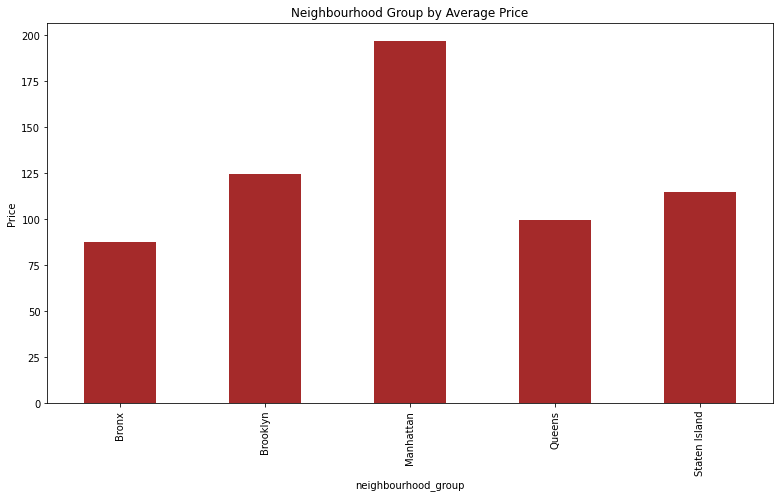

In [42]:
#Plottin Average price of neighbourhood Group
plt.figure(figsize=(13,7))
df1.groupby('neighbourhood_group')['price'].mean().plot(kind='bar',color='brown')
plt.ylabel('Price')
plt.title('Neighbourhood Group by Average Price')

In [ ]:
df1['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
df1['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
##filling NA values with zero
df1['reviews_per_month'].fillna(0,inplace=True)

In [ ]:
df1['reviews_per_month'].isna().sum()

0

In [ ]:
##finding top ten hosts
busy_hosts = df1['host_id'].value_counts().head(10)
busy_hosts

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [ ]:
#getting list of top ten host's
host = [219517861,107434423,30283594,137358866,16098958,12243051,61391963,22541573,200380610,7503643]

In [ ]:
data_h = df1.loc[df1['host_id'].isin(host)]

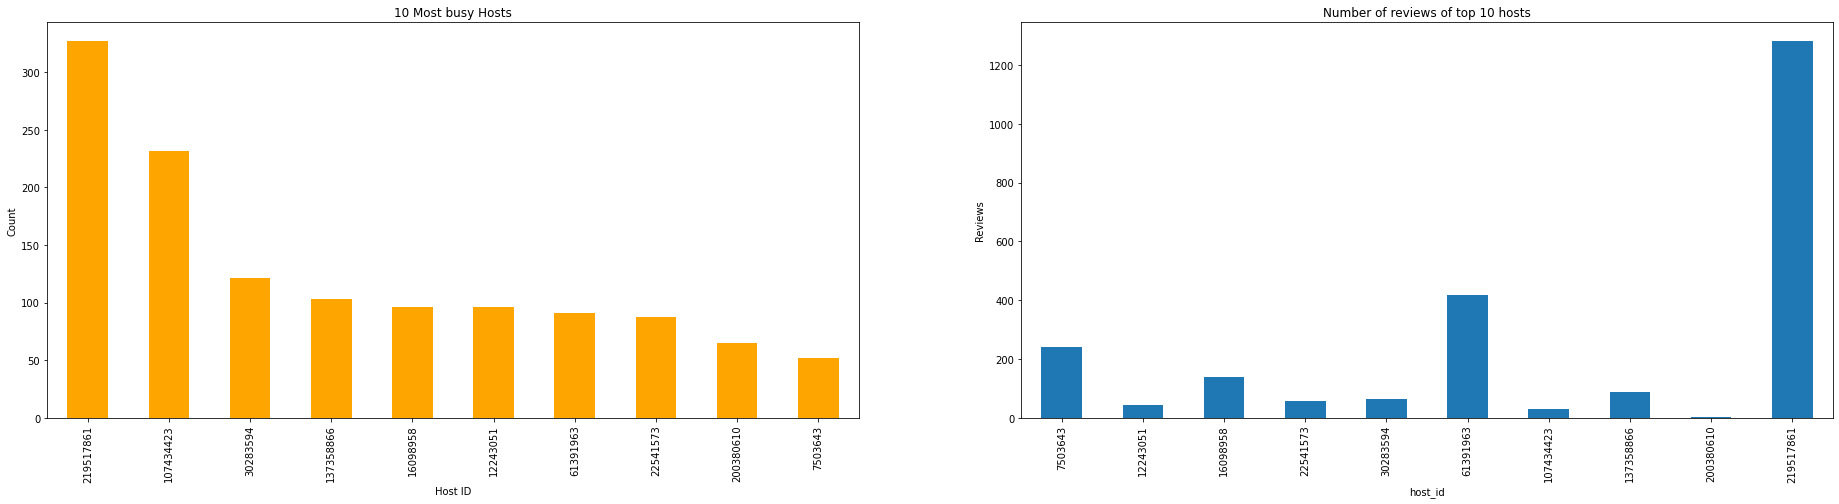

In [ ]:
#plotting top 10 host's and thier no of reviews
plt.figure(figsize=(32,16))
plt.subplot(2,2,1)
busy_hosts.plot.bar(color='orange')
plt.xlabel('Host ID')
plt.ylabel('Count')
plt.title('10 Most busy Hosts')

plt.subplot(2,2,2)
plt.title('Number of reviews of top 10 hosts')
plt.xlabel('Hosts')
plt.ylabel('Reviews')
data_h.groupby('host_id')['number_of_reviews'].sum().plot(kind='bar')



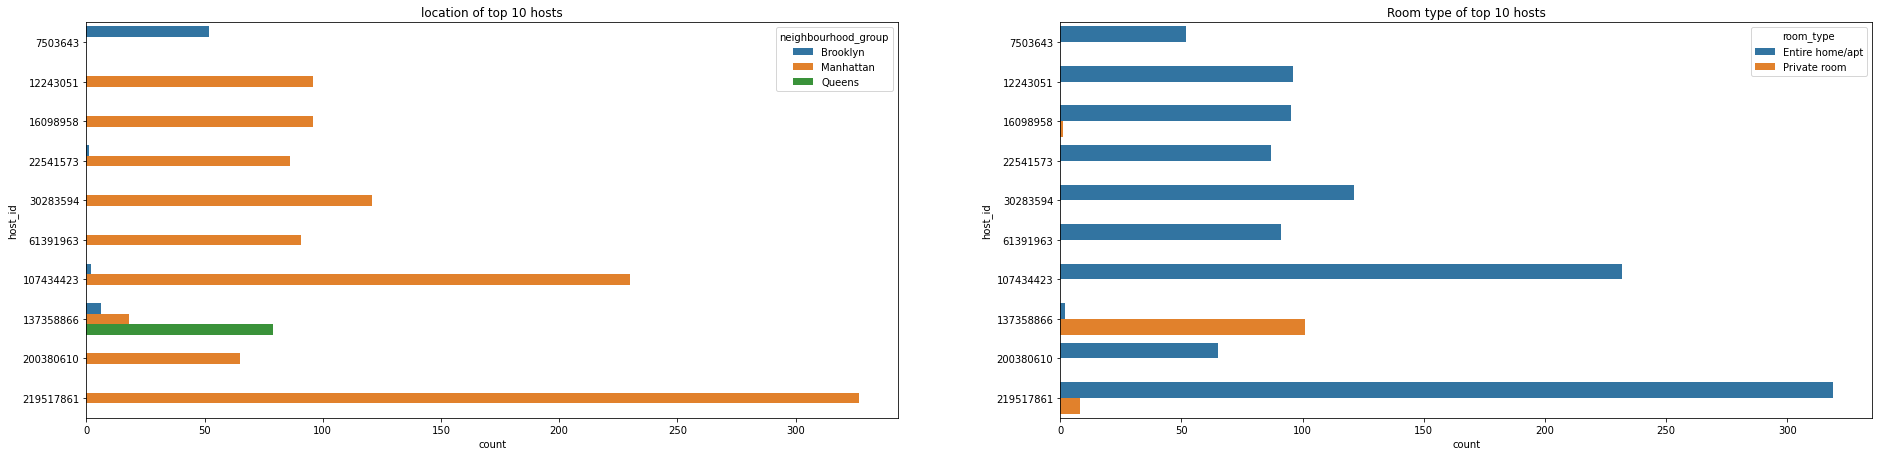

In [ ]:
#plotting top 10 hosts with location type and room type
plt.figure(figsize=(32,16))
plt.subplot(2,2,1)
plt.title('location of top 10 hosts')
plt.xlabel('Hosts')
plt.ylabel('count')
sns.countplot(data=data_h ,y='host_id',hue='neighbourhood_group')


plt.subplot(2,2,2)
plt.title('Room type of top 10 hosts')
plt.xlabel('host_id')
plt.ylabel('count')
sns.countplot(data=data_h ,y='host_id',hue='room_type')

In [ ]:
#price summary of top ten hosts
data_h.groupby('host_id')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
host_id,,,,,,,,
7503643,52.0,149.192308,21.737325,129.0,129.00,149.0,159.0,199.0
12243051,96.0,213.031250,41.744197,125.0,182.00,209.5,239.0,377.0
16098958,96.0,208.958333,74.615494,117.0,163.75,180.0,250.0,550.0
22541573,87.0,215.436782,35.533705,149.0,189.50,210.0,245.0,289.0
30283594,121.0,277.528926,159.004930,109.0,219.00,239.0,269.0,1170.0
61391963,91.0,146.241758,23.691696,109.0,125.00,142.0,159.0,200.0
107434423,232.0,303.150862,54.599673,184.0,267.00,302.5,330.5,481.0
137358866,103.0,43.825243,10.421911,24.0,37.00,41.0,50.0,76.0
200380610,65.0,290.230769,109.990308,150.0,200.00,250.0,350.0,600.0


In [ ]:
data_h['minimum_nights'].value_counts()

30     830
29     236
2      190
90       6
120      3
60       3
80       1
180      1
Name: minimum_nights, dtype: int64

|host\_id|count|mean|std|min|25%|50%|75%|max|
|---|---|---|---|---|---|---|---|---|
|7503643|52\.0|30\.0|0\.0|30\.0|30\.0|30\.0|30\.0|30\.0|
|12243051|96\.0|29\.0|0\.0|29\.0|29\.0|29\.0|29\.0|29\.0|
|16098958|96\.0|30\.0|0\.0|30\.0|30\.0|30\.0|30\.0|30\.0|
|22541573|87\.0|30\.0|0\.0|30\.0|30\.0|30\.0|30\.0|30\.0|
|30283594|121\.0|31\.132231404958677|9\.330900410964572|29\.0|30\.0|30\.0|30\.0|120\.0|
|61391963|91\.0|30\.32967032967033|3\.144854510165755|30\.0|30\.0|30\.0|30\.0|60\.0|
|107434423|232\.0|32\.19827586206897|12\.12826103071658|30\.0|30\.0|30\.0|30\.0|120\.0|
|137358866|103\.0|30\.0|0\.0|30\.0|30\.0|30\.0|30\.0|30\.0|
|200380610|65\.0|33\.69230769230769|20\.199723912812427|30\.0|30\.0|30\.0|30\.0|180\.0|
|219517861|327\.0|13\.311926605504587|13\.341915072827726|2\.0|2\.0|2\.0|29\.0|29\.0|

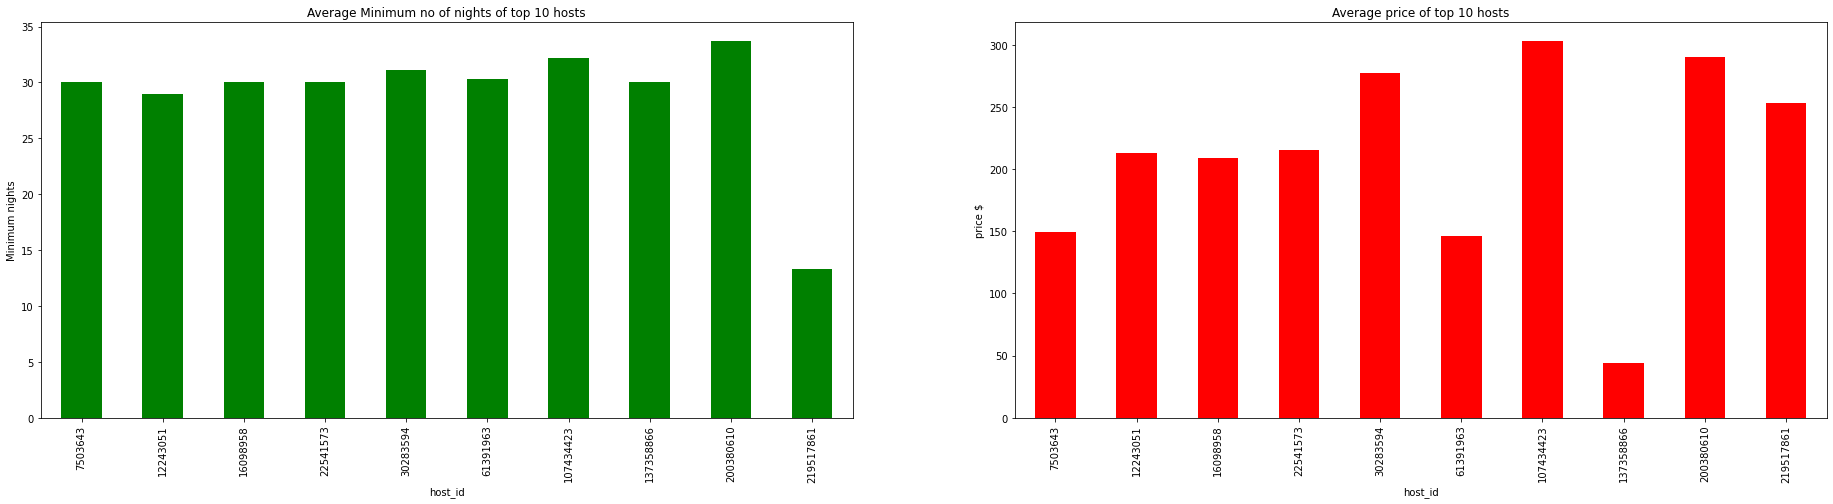

In [ ]:
#plotting top 10 hosts with Average minimum no of nights  and Avg prcie

plt.figure(figsize=(32,16))
plt.subplot(2,2,1)
plt.title('Average Minimum no of nights of top 10 hosts')
plt.xlabel('Hosts')
plt.ylabel('Minimum nights')
data_h.groupby('host_id')['minimum_nights'].mean().plot(kind='bar',color='green')

plt.subplot(2,2,2)
plt.title('Average price of top 10 hosts')
plt.xlabel('Hosts')
plt.ylabel('price $')
data_h.groupby('host_id')['price'].mean().plot(kind='bar',color='red')

In [ ]:
df1.groupby('neighbourhood_group')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


values which are more than $250 are assumed or hypothesised as outliers

In [ ]:
df_n = df1[df1['price']<250]

In [ ]:
df_n.shape

(42669, 13)

Text(0.5, 1.0, 'Price Distribution with Respect to Neighbourhood')

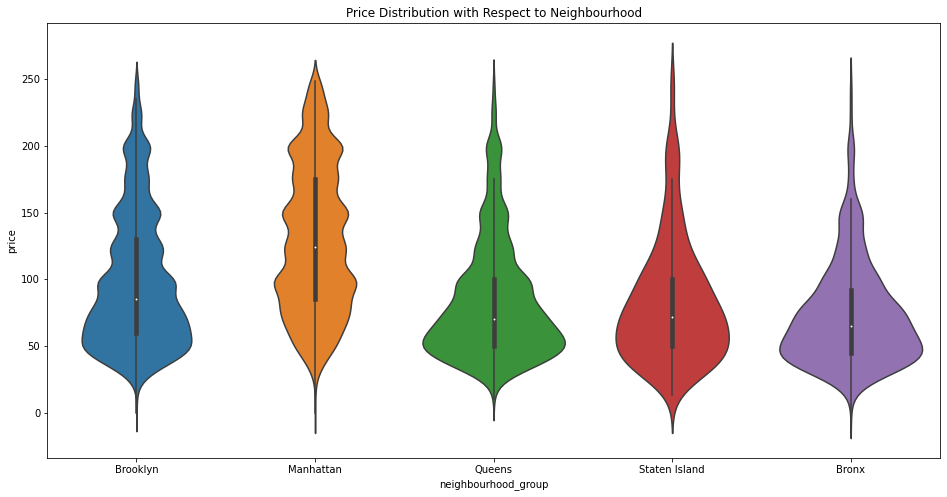

In [ ]:
plt.figure(figsize=(16, 8))
sns.violinplot(data=df_n, x="neighbourhood_group", y="price")
plt.title('Price Distribution with Respect to Neighbourhood')

Manhattan seems to have highest price and Bronx have the cheapest price 

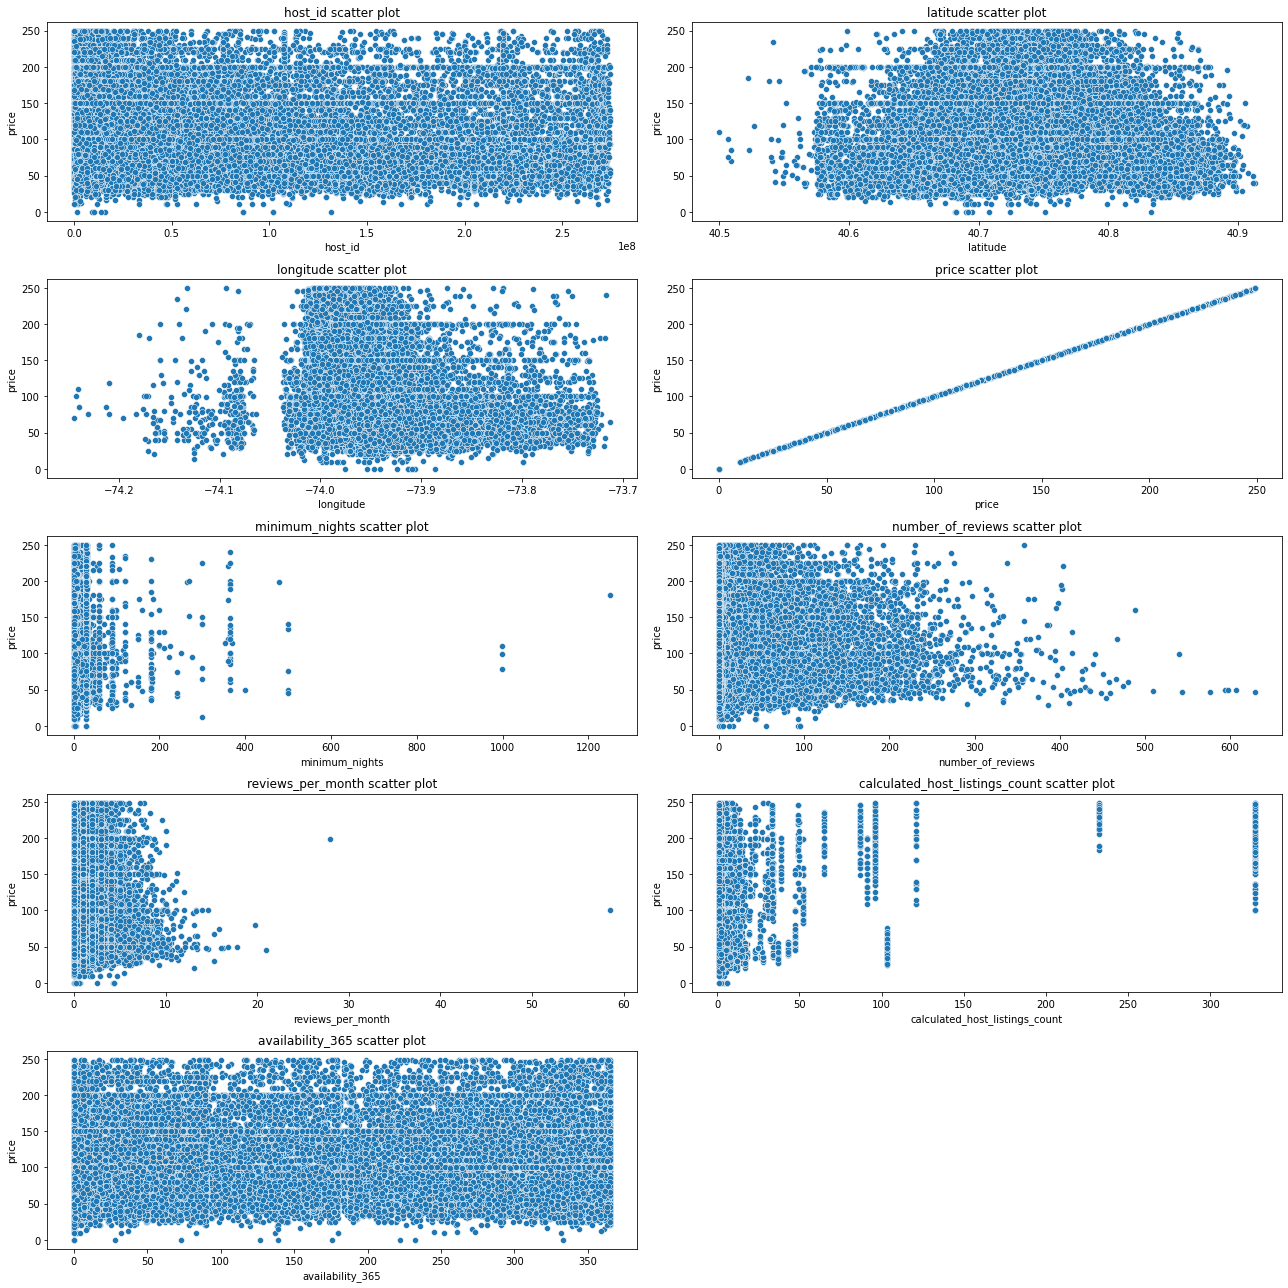

In [ ]:
#Comparing price with repect to different numerical features
plt.figure(figsize=(18, 18))
for i, col in enumerate(df_n.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.scatterplot(data= df_n,x=col,y='price')
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(f'{col} ''scatter plot')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


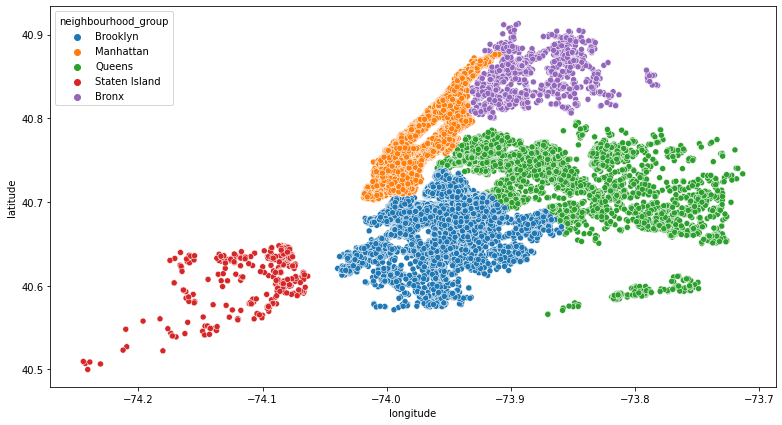

In [ ]:
#mapping the location of Neighbourhood group using longitude and latitude 
plt.figure(figsize=(13,7))
plt.rcParams['axes.facecolor'] = 'white'
sns.scatterplot(df_n.longitude,df_n.latitude,hue=df_n['neighbourhood_group'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


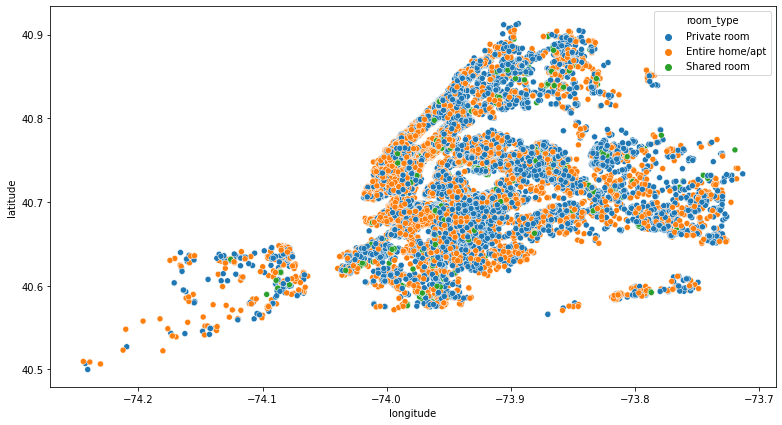

In [ ]:
#mapping the location of Room Type using longitude and latitude 
plt.figure(figsize=(13,7))
sns.scatterplot(df_n.longitude,df_n.latitude,hue=df_n['room_type'])


In [ ]:
#importing libraries to read and display image
import matplotlib.cbook as cbook
import matplotlib.image as image


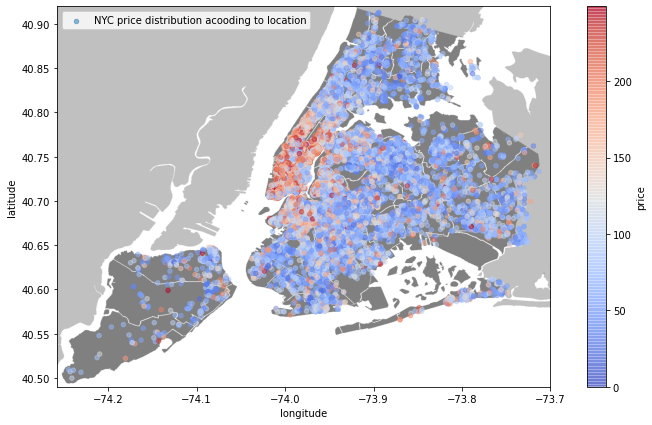

In [ ]:
with cbook.get_sample_data('/content/drive/My Drive/Neighbourhoods_New_York_City_Map.png') as file:
    nyc = image.imread(file)
#scaling the image based on the latitude and longitude max and mins 
plt.figure(figsize=(13,7))
plt.imshow(nyc,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#plotting
df_n.plot(kind='scatter', x='longitude', y='latitude',label='NYC price distribution acooding to location', c='price', ax=ax, 
           cmap='coolwarm', colorbar=True, alpha=0.5, zorder=4)
plt.legend()
plt.show()

In [ ]:
df_n.select_dtypes(include=['float64','int64']).columns

Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
plt.figure(figsize=(13,7))
correlation = df_n[['host_id', 'latitude', 'longitude', 'price', 'minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()


<Figure size 936x504 with 0 Axes>

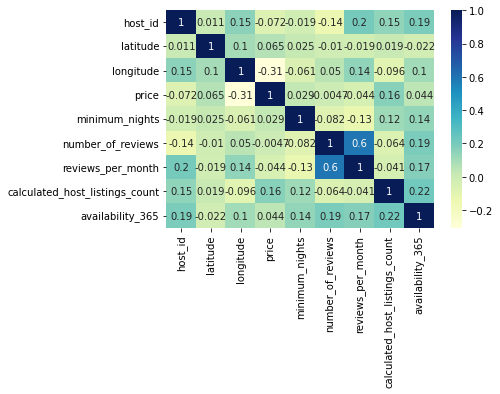

In [ ]:
#plotting correlation matrix of numerical features
sns.heatmap(correlation, cmap="YlGnBu",annot=True)
plt.show()

####BOX PLOT 

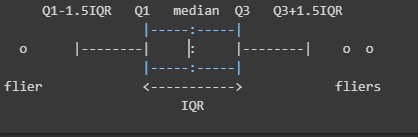

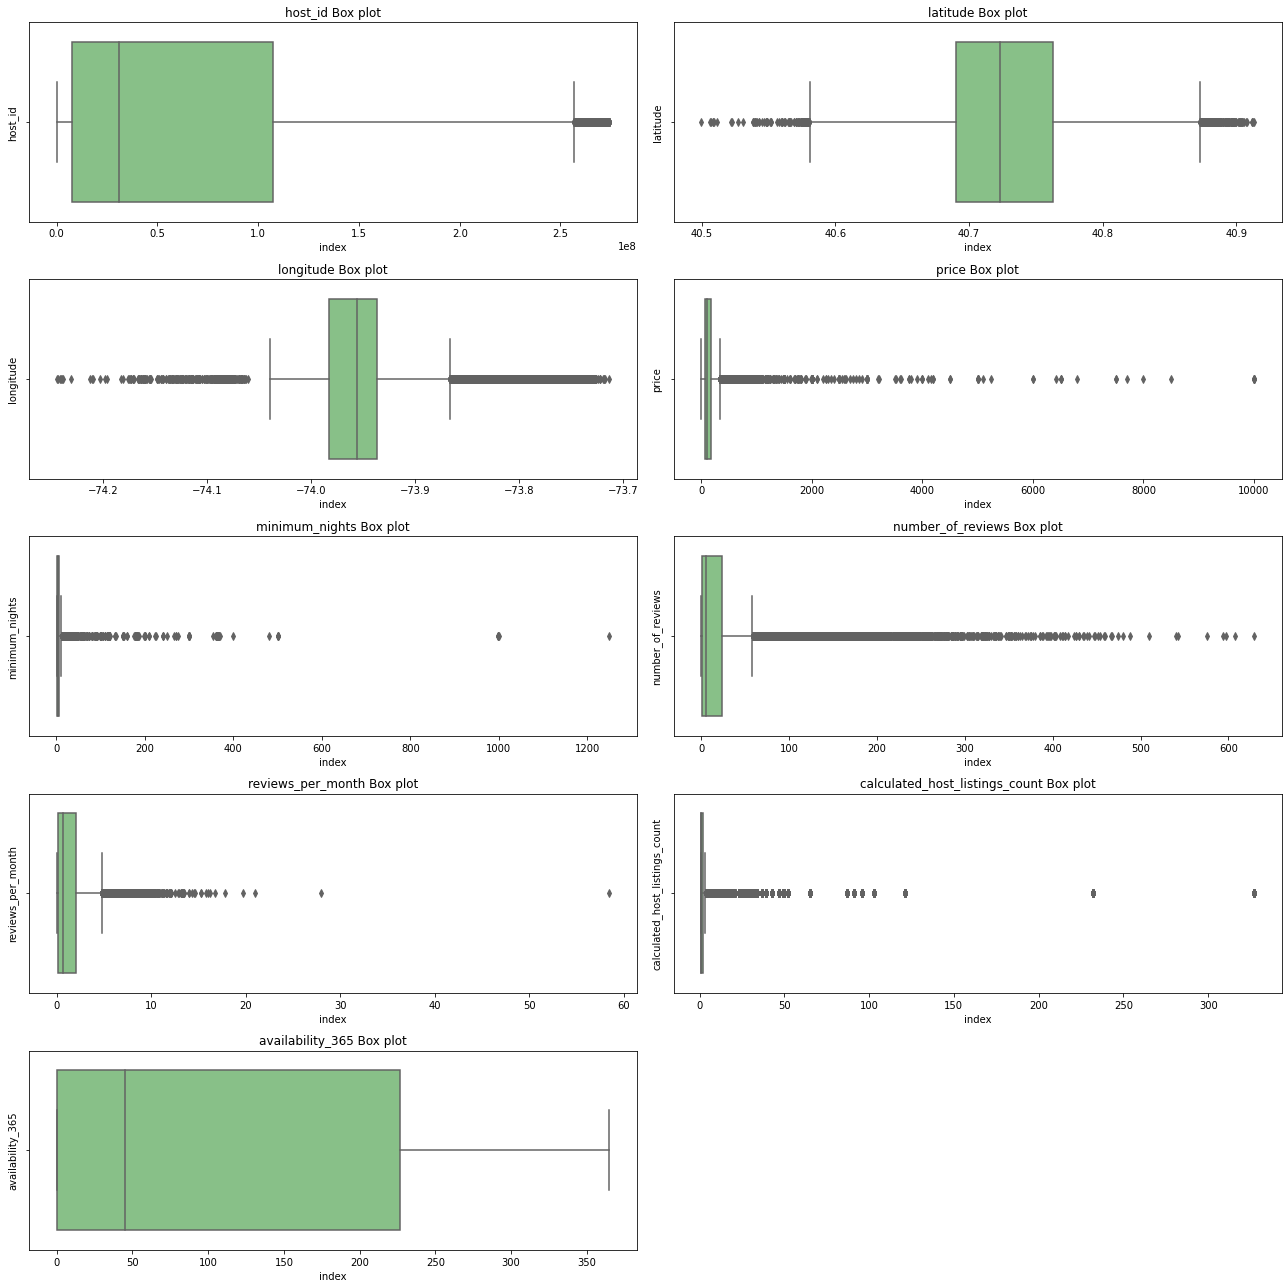

In [ ]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df_n.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(x=df[col],palette='Accent')
    plt.xlabel('index')
    plt.ylabel(col)
    plt.title(f'{col} ''Box plot')
plt.tight_layout()

Text(0.5, 1.0, 'Room type location per Neighbourhood Group')

<Figure size 936x504 with 0 Axes>

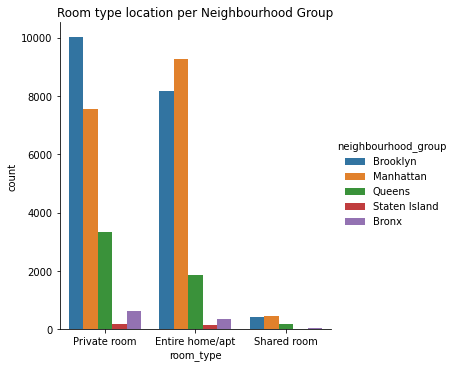

In [ ]:
plt.figure(figsize=(13,7))
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=df_n)
plt.title('Room type location per Neighbourhood Group')

##Conclusion:
1.In New york city Manhattan has highest price and Bronx     and staten island has the cheapest price\
2.Reviews doesn't have any large impact on booking\
3.Minimum number of night's are mostly range from 1 to 7 for more than 75% of values\
4.Review's also doesn't have any substantial impact on price\
5.In this project i have assumed that the highest price is $250 because 75%  of the values lies below 220 dollars\
6.Brooklyn has most number of private room\
7.Manhattan has most number of Apartment/Entire home\
8.Top 10 host mostly own their property in Manhattan and they are entire house
or apartment room type\
9.More than 75% of Busy host have property in manhattan
  And it mostly Entire home or apartment Room


